In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import powerlaw
import networkx as nx
from sumolib import net


In [3]:
df=pd.read_excel('output.xlsx')
df.head()

,vehid,coord,gpscoord,x_coord,y_coord,lon,lat,spd,traveltime,roadid,destination,waitingtime,laneindex,displacement,nextTLS,edge
0,0,"[1130.5759877800408, 730.8213238289205]","[13.399908223070772, 52.51931071244977]",1130.575988,730.821324,13.399908,52.519311,0.00,1000000.000000,23121445#1,-1119854969#0,0,0,0.00,"(('11663153817', 0, 154.45, 'G'), ('1166315381...",23121445#1
1,0,"[1131.2646852204593, 729.6979420300041]","[13.39991873576445, 52.51930075420122]",1131.264685,729.697942,13.399919,52.519301,4.74,11.180527,23121445#1,-1119854969#0,0,0,1.32,"(('11663153817', 0, 153.13253074060194, 'G'), ...",23121445#1
2,1,"[584.9528818680757, 951.5322615162703]","[13.391797729927996, 52.52118519044447]",584.952882,951.532262,13.391798,52.521185,0.00,1000000.000000,-492340367#1,-4612981#1,0,0,0.00,"(('1635318723', 1, 311.30000000000007, 'G'), (...",-492340367#1
3,0,"[1132.9369413075192, 726.9702100230595]","[13.399944262071442, 52.519276574142445]",1132.936941,726.970210,13.399944,52.519277,11.52,4.604558,23121445#1,-1119854969#0,0,0,4.52,"(('11663153817', 0, 149.9335265636677, 'G'), (...",23121445#1
4,1,"[584.7841301624928, 953.5402312908732]","[13.391794584687705, 52.521203201508975]",584.784130,953.540231,13.391795,52.521203,7.25,40.074876,-492340367#1,-4612981#1,0,0,2.01,"(('1635318723', 1, 309.2850218612934, 'G'), ('...",-492340367#1


In [4]:
vehicle_degree=df['vehid'].value_counts().reset_index()
vehicle_degree.columns=['vehid','degree']
vehicle_degree

,vehid,degree
0,2,4287
1,90,4202
2,116,4179
3,284,4049
4,576,3894
...,...,...
747,34,14
748,921,14
749,152,14
750,862,13


In [5]:
df['vehid'].nunique()

752

In [6]:
df['edge'].nunique()

1528

In [7]:
edge_vehicle_df=df.groupby('edge')['vehid'].apply(list).reset_index()
edge_vehicle_df.head()

,edge,vehid
0,-1040930907#2,[506]
1,-1040930907#3,"[116, 116, 116, 119, 119, 145, 145, 145, 184, ..."
2,-1040930907#4,"[116, 116, 116, 116, 116, 116, 116, 116, 119, ..."
3,-1101961674#0,"[444, 444, 444, 444, 444, 444, 444, 444, 444, ..."
4,-1101961674#1,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 69, 6..."


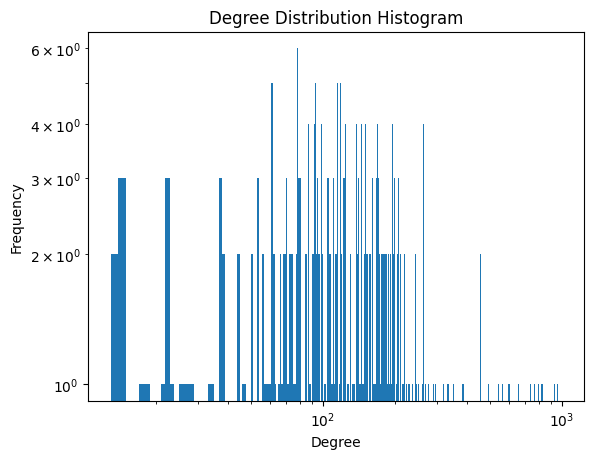

Calculating best minimal value for power law fit
Power-law exponent (alpha): 3.3891851396551553
Minimum value to start fitting (xmin): 1011.0
P-value for the fit: (np.float64(8.91917944895163), np.float64(0.021081924927277118))


In [12]:
plt.hist(vehicle_degree['degree'], bins=range(min(vehicle_degree['degree']),max(vehicle_degree['vehid'])))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution Histogram')
plt.show()

fit = powerlaw.Fit(vehicle_degree['degree'], discrete=True)
alpha = fit.alpha
xmin = fit.xmin

print("Power-law exponent (alpha):", alpha)
print("Minimum value to start fitting (xmin):", xmin)
print("P-value for the fit:", fit.distribution_compare('power_law', 'exponential'))


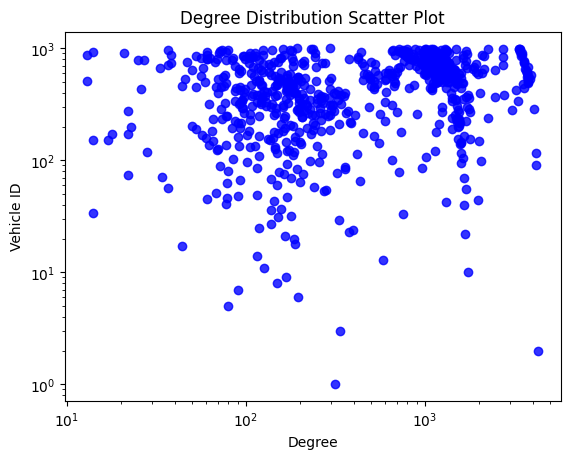

In [9]:
plt.scatter(vehicle_degree['degree'], vehicle_degree['vehid'], color='blue', alpha=0.8)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Vehicle ID')
plt.title('Degree Distribution Scatter Plot')
plt.show()

In [18]:
df=pd.read_excel('output.xlsx')
df.columns=['edge','vehid']
df.shape

ValueError: Length mismatch: Expected axis has 16 elements, new values have 2 elements